In [1]:
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import gridspec
plt.rc('text', usetex=True)

import glob
import os

In [2]:
def load_pkl(filename):
    try:
        import cPickle as pickle
    except:
        warnings.warn("## cPickle is not available!!")
        import pickle

    if os.path.isfile(filename):
        pklFile = open(filename, 'rb')
        data = pickle.load(pklFile)
        pklFile.close()

        return data
    else:
        warnings.warn("## Can not find %s, return None" % filename)
        return None
    


#find max number of sma's
#use as number of columns
#assign nans for those without
#nanmedian


def find_smas(pickles):
    smas=[]

    for pickle in pickles:

        iso = load_pkl(pickle)

        if len(iso['sma']) > len(smas):
            smas=iso['sma']

    return smas

In [4]:
################################################################################
#HSC
hsc_data='/Users/fardila/Documents/Github/HSC_vs_hydro/Data/HSC/'
hscAvgProf0 = load_pkl(hsc_data+"hscAvgProf0.pkl")
hscAvgProf1 = load_pkl(hsc_data+"hscAvgProf1.pkl")
hscAvgProf2 = load_pkl(hsc_data+"hscAvgProf2.pkl")

rm0_sl, rm0_ml, rm0_aml = hscAvgProf0['all'], hscAvgProf0['med'], hscAvgProf0['avg']
rm1_sl, rm1_ml, rm1_aml = hscAvgProf1['all'], hscAvgProf1['med'], hscAvgProf1['avg']
rm2_sl, rm2_ml, rm2_aml = hscAvgProf2['all'], hscAvgProf2['med'], hscAvgProf2['avg']

# Universal RSMA array
RSMA_COMMON = np.arange(0.4, 4.2, 0.01)

# These are the median stellar mass density profiles for HSC galaxies at 0.3 < z < 0.5
# in three mass bins
# rm0 : 11.4 < logM_100kpc < 11.6
# rm1 : 11.6 < logM_100kpc < 11.8
# rm2 : 11.8 < logM_100kpc < 12.0
# They are on a common radius array, and we use (r ** 0.25) as radius

In [3]:
#####################################################
#import files
data_loc='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/'
illustris_pickels=glob.glob('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/Illustris*3.pkl')
tng_pickels=glob.glob('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/TNG*3.pkl')
n_illustris=len(illustris_pickels)
n_tng=len(tng_pickels)

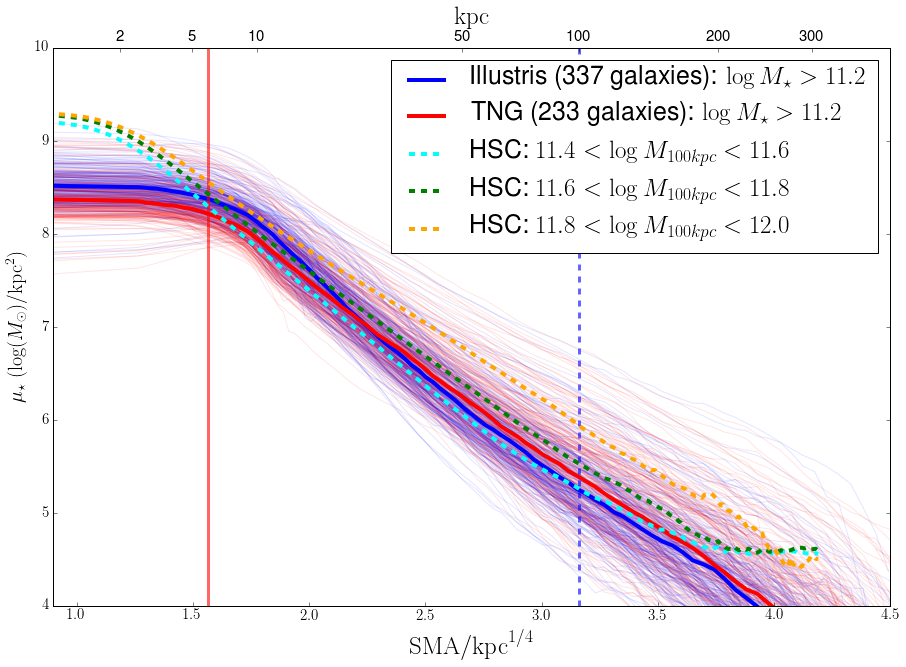

In [10]:
###############################################################################
#plot
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twiny()
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
                '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']



illustris_smas=find_smas(illustris_pickels)
illustris_mus=np.array([],  dtype=np.float32).reshape(0, len(illustris_smas))

tng_smas=find_smas(tng_pickels)
tng_mus=np.array([],  dtype=np.float32).reshape(0, len(tng_smas))

for illustris_pkl, tng_pkl in zip(illustris_pickels,tng_pickels):

    iso_illustris = load_pkl(illustris_pkl)
    iso_tng = load_pkl(tng_pkl)


    new_illustris=np.array(iso_illustris['sbp_cor'])
    new_illustris = np.pad(new_illustris, (0,len(illustris_smas)-len(new_illustris)), 'constant', constant_values=np.nan)
    illustris_mus= np.vstack((illustris_mus, new_illustris))

    new_tng=np.array(iso_tng['sbp_cor'])
    new_tng = np.pad(new_tng, (0,len(tng_smas)-len(new_tng)), 'constant', constant_values=np.nan)
    tng_mus= np.vstack((tng_mus, new_tng))


    ax1.plot((iso_illustris['sma']) ** 0.25,
         (iso_illustris['sbp_cor'] / -2.5) + np.log10(0.7 ** 2.0), linewidth=1.0, c='b', alpha=0.1)
             #label='Illustris Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))
    ax1.plot((iso_tng['sma']) ** 0.25,
         (iso_tng['sbp_cor'] / -2.5) + np.log10(0.7 ** 2.0), linewidth=1.0, c='r', alpha=0.1)
             #label='Illustris Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))

## median profiles for illustris and tng

illustris_med=np.nanmedian(np.array(illustris_mus), axis=0)
tng_med=np.nanmedian(np.array(tng_mus), axis=0)

ax1.plot((illustris_smas) ** 0.25,
         (illustris_med / -2.5) + np.log10(0.7 ** 2.0), linewidth=4.0, c='b', alpha=1)
ax1.plot((tng_smas) ** 0.25,
         (tng_med / -2.5) + np.log10(0.7 ** 2.0), linewidth=4.0, c='r', alpha=1)


## Median profiles from HSC
ax1.plot(RSMA_COMMON, rm0_aml[2], linestyle='--', linewidth=4.0, c='cyan',
         alpha=1, zorder=8, label='HSC: $11.4 < \log{M_{100kpc}} < 11.6$')
ax1.plot(RSMA_COMMON, rm1_aml[2], linestyle='--', linewidth=4.0, c='green',
         alpha=1, zorder=8, label='HSC: $11.6 < \log{M_{100kpc}} < 11.8$')
ax1.plot(RSMA_COMMON, rm2_aml[2], linestyle='--', linewidth=4.0, c='orange',
         alpha=1, zorder=8, label='HSC: $11.8 < \log{M_{100kpc}} < 12.0$')


ax1.set_xlim(0.9, 4.5)
ax1.set_ylim(4, 10)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax2.set_xlim(x1, x2)
ax2.figure.canvas.draw()
ax2.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax2.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])

ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax1.set_xlabel(r'$\mathrm{SMA/kpc}^{1/4}$', fontsize=25)
ax2.set_xlabel(r'$\mathrm{kpc}$', fontsize=25)
ax1.set_ylabel(r'$\mu_{\star}\ (\log (M_{\odot})/\mathrm{kpc}^2)$', fontsize=20)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

illustris_line = mlines.Line2D([], [], color='b', markersize=15, alpha=1,
                                linewidth=4.0, label='Illustris ('+ str(n_illustris)+' galaxies): $\log{M_{\star}} > 11.2$' )
tng_line = mlines.Line2D([], [], color='r', markersize=15, alpha=1,
                                linewidth=4.0, label='TNG ('+ str(n_tng)+' galaxies): $\log{M_{\star}} > 11.2$' )
hsc_line1 = mlines.Line2D([], [], markersize=15, alpha=1, linestyle='--', linewidth=4.0,
                            c='cyan', label='HSC: $11.4 < \log{M_{100kpc}} < 11.6$' )
hsc_line2 = mlines.Line2D([], [], markersize=15, alpha=1, linestyle='--', linewidth=4.0,
                            c='green', label='HSC: $11.6 < \log{M_{100kpc}} < 11.8$' )
hsc_line3 = mlines.Line2D([], [], markersize=15, alpha=1, linestyle='--', linewidth=4.0,
                            c='orange', label='HSC: $11.8 < \log{M_{100kpc}} < 12.0$')


ax1.legend(handles=[illustris_line, tng_line, hsc_line1, hsc_line2, hsc_line3], fontsize=25)

plt.show()

# Separate Illustris and TNG. 
## 2 mass bins (11.6 - 11.8) (11.8 - 12.0) and cumulative mass

In [35]:
print [p.strip('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/Illustris_')[:-18] for p in illustris_pickels]

['0', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '10', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '11', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '12', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '13', '140', '141', '143', '144', '145', '146', '147', '148', '149', '14', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '15', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '16', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '17', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '18', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '19', '1', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '20', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '21', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '22', '230', '

In [42]:
print [p[74:-19] for p in illustris_pickels]

['0', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '10', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '11', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '12', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '13', '140', '141', '143', '144', '145', '146', '147', '148', '149', '14', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '15', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '16', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '17', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '18', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '19', '1', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '20', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '21', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '22', '230', '

In [7]:
integrated_mass=[]
diff=[]
for pkl in illustris_pickels:

    iso_illustris = load_pkl(pkl)
    
    index= int(pkl[74:-19] )
    integrated_mass.append(iso_illustris['mag_tot'][0]/-2.5)
    diff.append(iso_illustris['mag_tot'][0]/-2.5 - m_stars_illustris[index])

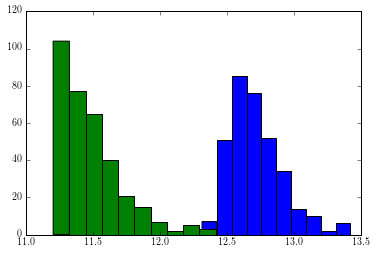

In [8]:
plt.hist(integrated_mass)
plt.hist(m_stars_illustris)
plt.show()

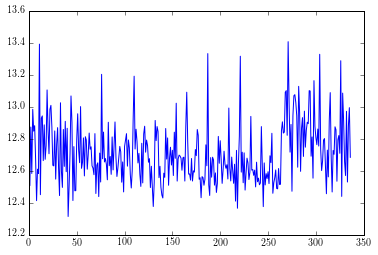

In [11]:
plt.plot(range(len(integrated_mass)),integrated_mass)
#plt.plot(range(len(m_stars_illustris)),m_stars_illustris)

plt.show()

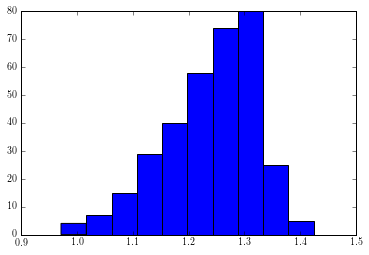

In [51]:
plt.hist(diff)
plt.show()

In [5]:
Illustris_file = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/galaxies_orig_11.2.hdf5'
TNG_file = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/galaxies_tng75_11.2.hdf5'

In [6]:
f = h5py.File(Illustris_file, 'r')
cat_sh_mstars = np.array(f['cat_sh_mstar'])
f.close()
m_stars_illustris=np.log10(cat_sh_mstars)
print m_stars_illustris, len(m_stars_illustris), len(illustris_pickels), len(tng_pickels)

#tng
f = h5py.File(TNG_file, 'r')
cat_sh_mstars = np.array(f['cat_sh_mstar'])
f.close()
m_stars_tng=np.log10(cat_sh_mstars)

[ 12.41485113  12.22203995  12.33545121  12.30699255  12.03476969
  12.03607648  12.25874166  12.06448193  12.17500048  12.16743207
  12.23647315  11.8981141   11.84430233  12.00578499  11.88141225
  11.49687985  11.97530837  11.64716856  11.51752495  11.87180685
  11.69709876  11.81872927  11.81435148  11.88218905  11.90475611
  11.7260319   12.17657024  11.67142131  11.88606696  11.65085109
  11.80059323  11.68222208  11.72432564  11.65042753  11.64717198
  11.74916165  11.76561593  11.87395714  11.96132917  11.6395395
  11.9371052   11.62954186  11.72908779  11.44151239  11.74579954
  11.84696469  11.89504505  11.80761116  11.75691568  11.47822289
  11.81541399  11.57121495  11.73422916  11.76424617  11.53973024
  11.7766385   11.54788076  11.74041691  11.66569843  11.75606504
  11.88261279  11.52458447  11.6347618   11.42614094  11.96790158
  11.58583361  11.54659808  11.51751172  11.60111445  11.46732677
  11.52195782  11.46259823  11.38556121  11.6405658   11.70417831
  11.448159

In [18]:
print iso_illustris['mag_tot']/-2.5

   mag_tot   
-------------
12.5070798938
12.5070798938
12.5070798938
12.5070798938
12.5070798938
12.5070798938
12.5070798938
12.5070798938
12.5070798938
12.5070798938
          ...
12.5070798938
12.5070798938
12.5070798938
12.5070798938
12.5070798938
12.5070798938
12.5070798938
12.5070798938
12.5070798938
12.5070798938
12.5070798938
Length = 113 rows


# For Illustris

In [69]:
iso_illustris = load_pkl(illustris_pickels[0])
print iso_illustris.colnames
print np.log10(iso_illustris['growth_cor'])

['sma', 'intens', 'int_err', 'pix_var', 'rms', 'ell', 'ell_err', 'pa', 'pa_err', 'x0', 'x0_err', 'y0', 'y0_err', 'grad', 'grad_err', 'grad_r_err', 'rsma', 'mag', 'mag_lerr', 'mag_uerr', 'tflux_e', 'tflux_c', 'tmag_e', 'tmag_c', 'npix_e', 'npix_c', 'a3', 'a3_err', 'b3', 'b3_err', 'a4', 'a4_err', 'b4', 'b4_err', 'ndata', 'nflag', 'niter', 'stop', 'a_big', 'sarea', 'a1', 'a1_err', 'b1', 'b1_err', 'a2', 'a2_err', 'b2', 'b2_err', 'col49', 'col50', 'col51', 'col52', 'col53', 'col54', 'col55', 'col56', 'pa_norm', 'sbp_ori', 'sbp_sub', 'sbp', 'intens_sub', 'intens_bkg', 'sbp_err', 'sbp_low', 'sbp_upp', 'sma_asec', 'rsma_asec', 'growth_ori', 'growth_sub', 'avg_x0', 'avg_y0', 'avg_q', 'avg_pa', 'avg_bkg', 'intens_cor', 'sbp_cor', 'growth_cor', 'rad_outer', 'mag_tot', 'mag_tot_ori', 'mag_tot_sub']
  growth_cor 
-------------
         -inf
         -inf
10.9683686755
11.2892777697
11.4854529991
11.6306679003
11.7480344838
11.8478395081
11.9355609512
12.0144623132
          ...
13.6820252178
13.682

/Users/fardila/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


In [18]:
len(m_stars_illustris[(m_stars_illustris<12)&(m_stars_illustris>11.6)])

70

49
21


/Users/fardila/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:173: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:180: RuntimeWarning: divide by zero encountered in log10


70


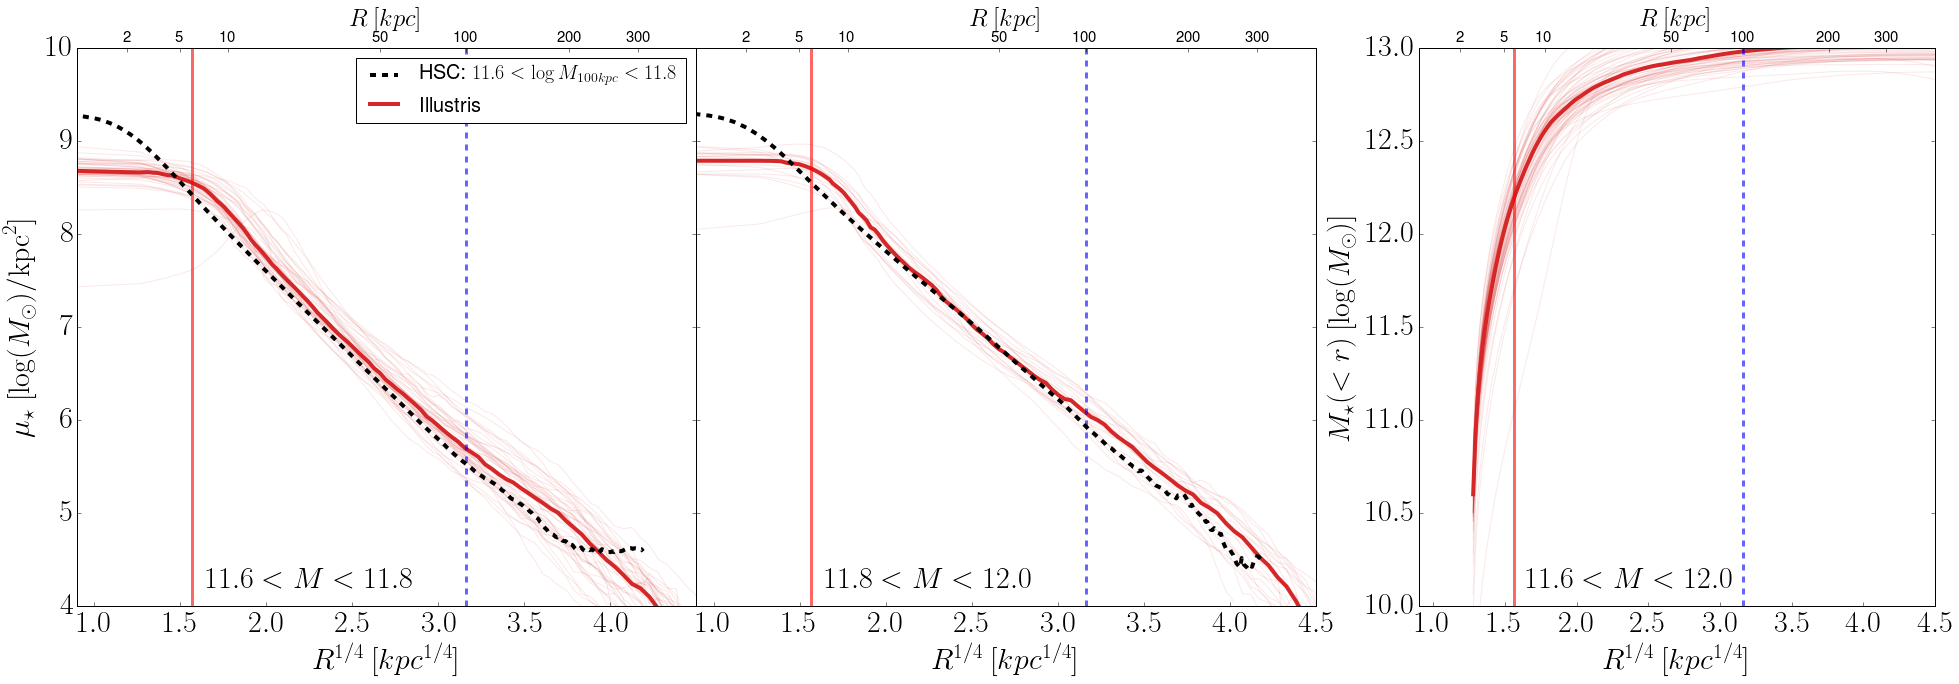

In [19]:
# fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=False, figsize=(10*3, 10))
# fig.subplots_adjust(left=0.22, right=0.995, bottom=0.14, top=0.94, wspace=0.00, hspace=0.00)
fig=plt.figure(figsize=(10*6, 10))
gs1 = gridspec.GridSpec(1, 3)
gs1.update(left=0.05, right=0.48, wspace=0.0)
ax1 = plt.subplot(gs1[0, 0])
ax2 = plt.subplot(gs1[0, 1])
gs2 = gridspec.GridSpec(1, 3)
gs2.update(left=0.05, right=0.48, wspace=0.3)
ax3 = plt.subplot(gs2[0, -1])


######################################################################################################################
#ax1: M_star 11.6 - 11.8
######################################################################################################################
#hsc
ax1.plot(RSMA_COMMON, rm1_aml[2], linestyle='--', linewidth=4.0, c='k',
         alpha=1, zorder=8, label='HSC: $11.6 < \log{M_{100kpc}} < 11.8$')


#illustris
illustris_smas=find_smas(illustris_pickels)
illustris_mus=np.array([],  dtype=np.float32).reshape(0, len(illustris_smas))
ngals=0

for illustris_pkl in illustris_pickels:
    
    index=int(illustris_pkl.strip('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/Illustris_')[:-18])
    mass=m_stars_illustris[index]
    if (mass<11.6) or (mass>11.8):
        continue

    ngals+=1
    iso_illustris = load_pkl(illustris_pkl)


    new_illustris=np.array(iso_illustris['sbp_cor'])
    new_illustris = np.pad(new_illustris, (0,len(illustris_smas)-len(new_illustris)), 'constant', constant_values=np.nan)
    illustris_mus= np.vstack((illustris_mus, new_illustris))

    
    ax1.plot((iso_illustris['sma']) ** 0.25,
         (iso_illustris['sbp_cor'] / -2.5) + np.log10(0.7 ** 2.0), linewidth=1.0, c=u'#d62728', alpha=0.1, 
             label='_nolegend_')
             #label='Illustris Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))
    
## median profiles for illustris
illustris_med=np.nanmedian(np.array(illustris_mus), axis=0)

ax1.plot((illustris_smas) ** 0.25,
         (illustris_med / -2.5) + np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#d62728', alpha=1, label='Illustris')

# # X-Y limits
ax1.set_xlim(0.9, 4.5)
ax1.set_ylim(4, 10)

print ngals
# # Labels
# ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
#                size=60)
# ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
#                size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

# #ax1.text(11.8, -3.7, r'$\mathrm{Normalized}$', size=60)
# ax1.axvline(11.6, linestyle='--', linewidth=4.0, alpha=0.8, zorder=0)

#text label
ax1.text(1.65, 4.2, r'$11.6<M<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################
#ax2: M_star 11.8 - 12.0
######################################################################################################################
#HSC
ax2.plot(RSMA_COMMON, rm2_aml[2], linestyle='--', linewidth=4.0, c='k',
         alpha=1, zorder=8, label='HSC: $11.8 < \log{M_{100kpc}} < 12.0$')
  

#illustris
illustris_smas=find_smas(illustris_pickels)
illustris_mus=np.array([],  dtype=np.float32).reshape(0, len(illustris_smas))
ngals=0

for illustris_pkl in illustris_pickels:
    
    index=int(illustris_pkl.strip('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/Illustris_')[:-18])
    mass=m_stars_illustris[index]
    if (mass<11.8) or (mass>12.0):
        continue

    iso_illustris = load_pkl(illustris_pkl)
    ngals+=1

    new_illustris=np.array(iso_illustris['sbp_cor'])
    new_illustris = np.pad(new_illustris, (0,len(illustris_smas)-len(new_illustris)), 'constant', constant_values=np.nan)
    illustris_mus= np.vstack((illustris_mus, new_illustris))

    
    ax2.plot((iso_illustris['sma']) ** 0.25,
         (iso_illustris['sbp_cor'] / -2.5) + np.log10(0.7 ** 2.0), linewidth=1.0, c=u'#d62728', alpha=0.1, label='_nolegend_')
             #label='Illustris Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))
    
## median profiles for illustris
illustris_med=np.nanmedian(np.array(illustris_mus), axis=0)

ax2.plot((illustris_smas) ** 0.25,
         (illustris_med / -2.5) + np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#d62728', alpha=1)

print ngals
# # X-Y limits
ax2.set_xlim(0.9, 4.5)
ax2.set_ylim(4, 10)

# # Label
# ax2.set_xlabel(r'$\log\ (M_{\star, 100kpc}/M_{\odot})$', 
#                size=60)
ax2.tick_params(axis='x', which='major', labelsize=30)

# ax2.axvline(11.6, linestyle='--', linewidth=4.0, alpha=0.8, zorder=0)

#text label
ax2.text(1.65, 4.2, r'$11.8<M<12.0$', size=30)

#add twin x axis in kpc
x1, x2 = ax2.get_xlim()
ax2_twin = ax2.twiny()
ax2_twin.set_xlim(x1, x2)
ax2_twin.figure.canvas.draw()
ax2_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax2_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax2_twin.tick_params(axis='both', which='major', labelsize=15)
ax2_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################
#ax3: cumulative mass
######################################################################################################################
#HSC

#illustris
illustris_smas=find_smas(illustris_pickels)
illustris_mus=np.array([],  dtype=np.float32).reshape(0, len(illustris_smas))
ngals=0

for illustris_pkl in illustris_pickels:
    
    index=int(illustris_pkl.strip('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/Illustris_')[:-18])
    mass=m_stars_illustris[index]
    if (mass<11.6) or (mass>12.0):
        continue

    ngals+=1
    iso_illustris = load_pkl(illustris_pkl)
    

    new_illustris=np.array(iso_illustris['growth_cor'])
    new_illustris = np.pad(new_illustris, (0,len(illustris_smas)-len(new_illustris)), 'constant', constant_values=np.nan)
    illustris_mus= np.vstack((illustris_mus, new_illustris))

    
    ax3.plot((iso_illustris['sma']) ** 0.25,
         np.log10(iso_illustris['growth_cor']), linewidth=1.0, c=u'#d62728', alpha=0.1, label='_nolegend_')
             #label='Illustris Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))
    
## median profiles for illustris
illustris_med=np.nanmedian(np.array(illustris_mus), axis=0)

ax3.plot((illustris_smas) ** 0.25,
         np.log10(illustris_med), linewidth=4.0, c=u'#d62728', alpha=1)


print ngals
# # X-Y limits
ax3.set_xlim(0.9, 4.5)
ax3.set_ylim(10, 13)


ax3.tick_params(axis='both', which='major', labelsize=30)


#text label
ax3.text(1.65, 10.1, r'$11.6<M<12.0$', size=30)

#add twin x axis in kpc
x1, x2 = ax3.get_xlim()
ax3_twin = ax3.twiny()
ax3_twin.set_xlim(x1, x2)
ax3_twin.figure.canvas.draw()
ax3_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax3_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax3_twin.tick_params(axis='both', which='major', labelsize=15)
ax3_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)


######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax2.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax3.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax3.set_ylabel(r'$M_{\star}( < r ) \: [ \log (M_{\odot})]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax2.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax2.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax3.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax3.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

#plt.setp([a.get_yticklabels() for a in fig.axes[1:]], visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
#plt.setp(ax2.get_xticklabels()[0], visible=False)

#remove last label in x-axis of ax1 to prevent overlaping of labels with ax2
labels1 = [item.get_text() for item in ax2.get_xticklabels()[:-1]]
ax1.set_xticklabels(labels1)


# for a in fig.axes[1:]:
#     a.yaxis.set_ticks_position('none')

    
# Legend
#ax2.legend(loc='upper right', fontsize=36, markerscale=1.2, borderpad=0.3, handletextpad=0.34)


#add a bit of space between subplots
#plt.tight_layout()

fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_Illustris.pdf', dpi=100, format='pdf')

plt.show()

# TO DO

## figure out mass discrepancies

## TNG

29
14


/Users/fardila/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:173: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:180: RuntimeWarning: divide by zero encountered in log10


43


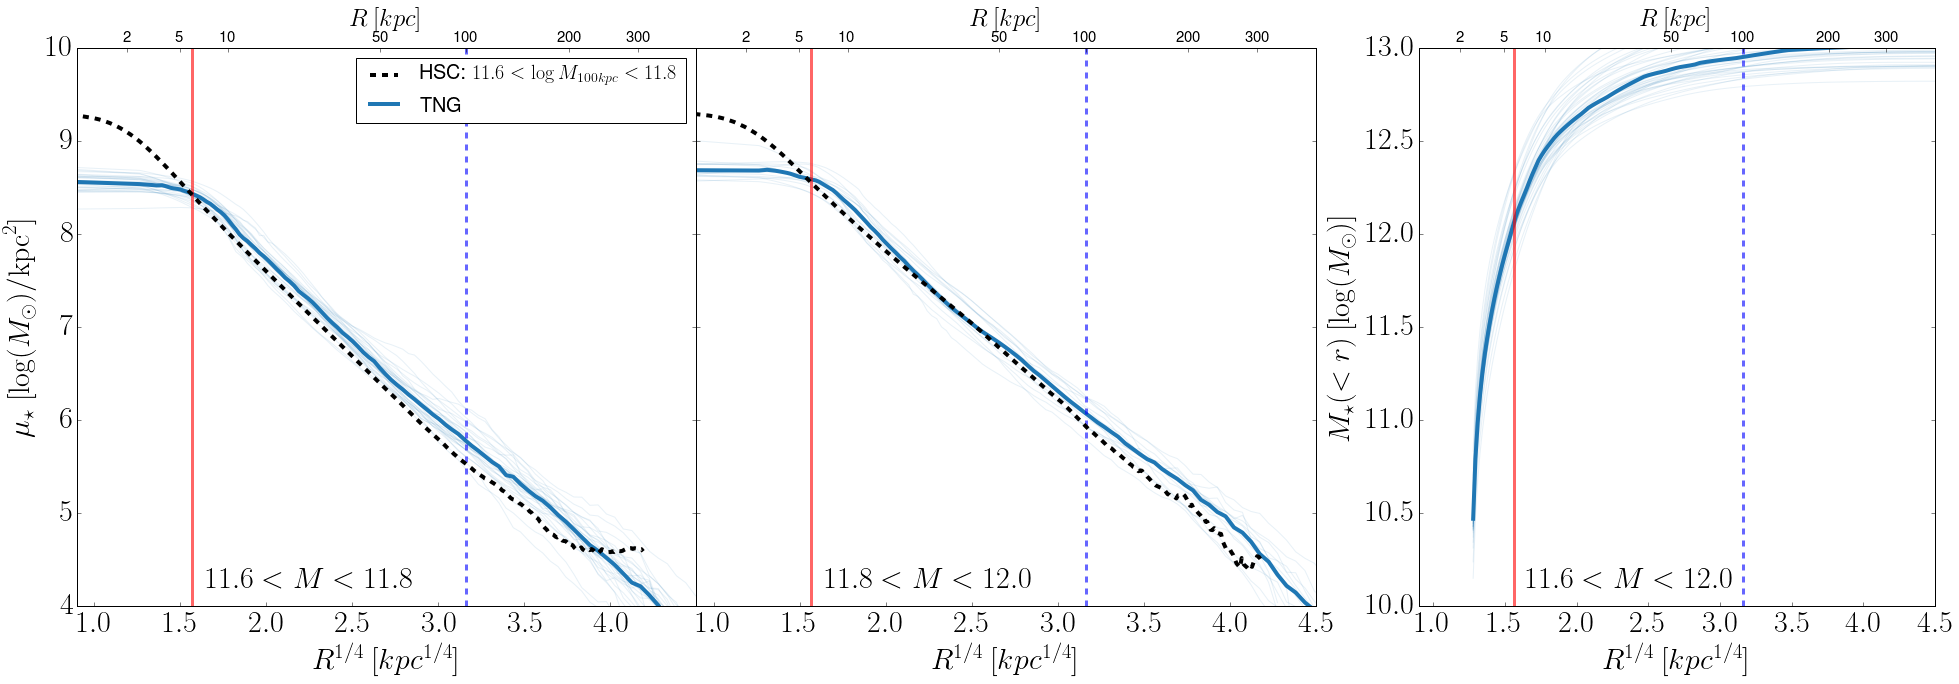

In [21]:
# fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=False, figsize=(10*3, 10))
# fig.subplots_adjust(left=0.22, right=0.995, bottom=0.14, top=0.94, wspace=0.00, hspace=0.00)
fig=plt.figure(figsize=(10*6, 10))
gs1 = gridspec.GridSpec(1, 3)
gs1.update(left=0.05, right=0.48, wspace=0.0)
ax1 = plt.subplot(gs1[0, 0])
ax2 = plt.subplot(gs1[0, 1])
gs2 = gridspec.GridSpec(1, 3)
gs2.update(left=0.05, right=0.48, wspace=0.3)
ax3 = plt.subplot(gs2[0, -1])


######################################################################################################################
#ax1: M_star 11.6 - 11.8
######################################################################################################################
#hsc
ax1.plot(RSMA_COMMON, rm1_aml[2], linestyle='--', linewidth=4.0, c='k',
         alpha=1, zorder=8, label='HSC: $11.6 < \log{M_{100kpc}} < 11.8$')


#tng
tng_smas=find_smas(tng_pickels)
tng_mus=np.array([],  dtype=np.float32).reshape(0, len(tng_smas))
ngals=0

for tng_pkl in tng_pickels:
    
    index=int(tng_pkl.strip('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/TNG_')[:-18])
    mass=m_stars_tng[index]
    if (mass<11.6) or (mass>11.8):
        continue

    ngals+=1
    iso_tng = load_pkl(tng_pkl)


    new_tng=np.array(iso_tng['sbp_cor'])
    new_tng = np.pad(new_tng, (0,len(tng_smas)-len(new_tng)), 'constant', constant_values=np.nan)
    tng_mus= np.vstack((tng_mus, new_tng))

    
    ax1.plot((iso_tng['sma']) ** 0.25,
         (iso_tng['sbp_cor'] / -2.5) + np.log10(0.7 ** 2.0), linewidth=1.0, c=u'#1f77b4', alpha=0.1, 
             label='_nolegend_')
             #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))
    
## median profiles for tng
tng_med=np.nanmedian(np.array(tng_mus), axis=0)

ax1.plot((tng_smas) ** 0.25,
         (tng_med / -2.5) + np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#1f77b4', alpha=1, label='TNG')

# # X-Y limits
ax1.set_xlim(0.9, 4.5)
ax1.set_ylim(4, 10)

print ngals
# # Labels
# ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
#                size=60)
# ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
#                size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

# #ax1.text(11.8, -3.7, r'$\mathrm{Normalized}$', size=60)
# ax1.axvline(11.6, linestyle='--', linewidth=4.0, alpha=0.8, zorder=0)

#text label
ax1.text(1.65, 4.2, r'$11.6<M<11.8$', size=30)

ax1.legend(fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax1_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################
#ax2: M_star 11.8 - 12.0
######################################################################################################################
#HSC
ax2.plot(RSMA_COMMON, rm2_aml[2], linestyle='--', linewidth=4.0, c='k',
         alpha=1, zorder=8, label='HSC: $11.8 < \log{M_{100kpc}} < 12.0$')
  

#tng
tng_smas=find_smas(tng_pickels)
tng_mus=np.array([],  dtype=np.float32).reshape(0, len(tng_smas))
ngals=0

for tng_pkl in tng_pickels:
    
    index=int(tng_pkl.strip('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/TNG_')[:-18])
    mass=m_stars_tng[index]
    if (mass<11.8) or (mass>12.0):
        continue

    iso_tng = load_pkl(tng_pkl)
    ngals+=1

    new_tng=np.array(iso_tng['sbp_cor'])
    new_tng = np.pad(new_tng, (0,len(tng_smas)-len(new_tng)), 'constant', constant_values=np.nan)
    tng_mus= np.vstack((tng_mus, new_tng))

    
    ax2.plot((iso_tng['sma']) ** 0.25,
         (iso_tng['sbp_cor'] / -2.5) + np.log10(0.7 ** 2.0), linewidth=1.0, c=u'#1f77b4', alpha=0.1, label='_nolegend_')
             #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))
    
## median profiles for tng
tng_med=np.nanmedian(np.array(tng_mus), axis=0)

ax2.plot((tng_smas) ** 0.25,
         (tng_med / -2.5) + np.log10(0.7 ** 2.0), linewidth=4.0, c=u'#1f77b4', alpha=1)

print ngals
# # X-Y limits
ax2.set_xlim(0.9, 4.5)
ax2.set_ylim(4, 10)

# # Label
# ax2.set_xlabel(r'$\log\ (M_{\star, 100kpc}/M_{\odot})$', 
#                size=60)
ax2.tick_params(axis='x', which='major', labelsize=30)

# ax2.axvline(11.6, linestyle='--', linewidth=4.0, alpha=0.8, zorder=0)

#text label
ax2.text(1.65, 4.2, r'$11.8<M<12.0$', size=30)

#add twin x axis in kpc
x1, x2 = ax2.get_xlim()
ax2_twin = ax2.twiny()
ax2_twin.set_xlim(x1, x2)
ax2_twin.figure.canvas.draw()
ax2_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax2_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax2_twin.tick_params(axis='both', which='major', labelsize=15)
ax2_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################
#ax3: cumulative mass
######################################################################################################################
#HSC

#tng
tng_smas=find_smas(tng_pickels)
tng_mus=np.array([],  dtype=np.float32).reshape(0, len(tng_smas))
ngals=0

for tng_pkl in tng_pickels:
    
    index=int(tng_pkl.strip('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/TNG_')[:-18])
    mass=m_stars_tng[index]
    if (mass<11.6) or (mass>12.0):
        continue

    ngals+=1
    iso_tng = load_pkl(tng_pkl)
    

    new_tng=np.array(iso_tng['growth_cor'])
    new_tng = np.pad(new_tng, (0,len(tng_smas)-len(new_tng)), 'constant', constant_values=np.nan)
    tng_mus= np.vstack((tng_mus, new_tng))

    
    ax3.plot((iso_tng['sma']) ** 0.25,
         np.log10(iso_tng['growth_cor']), linewidth=1.0, c=u'#1f77b4', alpha=0.1, label='_nolegend_')
             #label='tng Galaxy '+str(i)+': $M_{\star} = $'+str(round(m_star,1)))
    
## median profiles for tng
tng_med=np.nanmedian(np.array(tng_mus), axis=0)

ax3.plot((tng_smas) ** 0.25,
         np.log10(tng_med), linewidth=4.0, c=u'#1f77b4', alpha=1)


print ngals
# # X-Y limits
ax3.set_xlim(0.9, 4.5)
ax3.set_ylim(10, 13)


ax3.tick_params(axis='both', which='major', labelsize=30)


#text label
ax3.text(1.65, 10.1, r'$11.6<M<12.0$', size=30)

#add twin x axis in kpc
x1, x2 = ax3.get_xlim()
ax3_twin = ax3.twiny()
ax3_twin.set_xlim(x1, x2)
ax3_twin.figure.canvas.draw()
ax3_twin.xaxis.set_ticks([2**0.25, 5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25, 300**0.25])
ax3_twin.xaxis.set_ticklabels([2, 5, 10, 50, 100, 200, 300])
ax3_twin.tick_params(axis='both', which='major', labelsize=15)
ax3_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)


######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax2.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax3.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax3.set_ylabel(r'$M_{\star}( < r ) \: [ \log (M_{\odot})]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax2.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax2.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax3.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6)
ax3.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

######################################################################################################################
#adjustments to ticks and space between subplots

#plt.setp([a.get_yticklabels() for a in fig.axes[1:]], visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
#plt.setp(ax2.get_xticklabels()[0], visible=False)

#remove last label in x-axis of ax1 to prevent overlaping of labels with ax2
labels1 = [item.get_text() for item in ax2.get_xticklabels()[:-1]]
ax1.set_xticklabels(labels1)


# for a in fig.axes[1:]:
#     a.yaxis.set_ticks_position('none')

    
# Legend
#ax2.legend(loc='upper right', fontsize=36, markerscale=1.2, borderpad=0.3, handletextpad=0.34)


#add a bit of space between subplots
#plt.tight_layout()

fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/surface_brightness_TNG.pdf', dpi=100, format='pdf')

plt.show()